In [ ]:


# To be used for missing value imputation
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

!pip install lightgbm
import lightgbm as lgb

from sklearn.dummy import DummyClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
'''from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    plot_roc_curve,
)'''

# To be used for data scaling and encoding
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    RobustScaler,
)
from sklearn.impute import SimpleImputer

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin


# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# set the background for the graphs
plt.style.use("ggplot")

# For pandas profiling
#from pandas_profiling import ProfileReport

# Printing style
!pip install tabulate
from tabulate import tabulate

# To supress warnings
import warnings

# date time
from datetime import datetime

warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:
pip install statsmodels


In [ ]:
credit_data = pd.read_excel("credit_card.xlsx")

<h1> HYPOTHESIS TEST 1 </h1>


<h1> z test</h1>Null Hypothesis (H0): The proportion of men among individuals with a credit limit greater than 25,000 is greater than or equal to 90%.

Alternative Hypothesis (H1): The proportion of men among individuals with a credit limit greater than 25,000 is less than 90%.

In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

high_credit_data = credit_data[credit_data['Credit_Limit'] > 25000]
num_men = high_credit_data[high_credit_data['Gender'] == 'M'].shape[0]
total_individuals = high_credit_data.shape[0]

# Calculate the proportion of men
proportion_men = num_men / total_individuals

# Set the expected proportion under the null hypothesis
expected_proportion = 0.9

# Perform a one-sided proportion test
z_statistic, p_value = proportions_ztest(num_men, total_individuals, value=expected_proportion, alternative='smaller')

# Print the results
print("Proportion of Men:", proportion_men)
print("Z-Statistic:", z_statistic)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is enough evidence to suggest that the proportion of men is less than 90%.")
else:
    print("Fail to reject the null hypothesis. There is  enough evidence to suggest that the proportion of men is MORE than 90%.")


Proportion of Men: 0.903954802259887
Z-Statistic: 0.5646771591959807
P-Value: 0.7138533136322209
Fail to reject the null hypothesis. There is  enough evidence to suggest that the proportion of men is MORE than 90%.


Certainly, there are different statistical tests that can be used depending on the nature of your data and the hypothesis you want to test. In the context of comparing proportions, besides the z-test, another commonly used test is the chi-square test for independence. The choice between these tests often depends on the specific characteristics of your data.

Let's consider using the chi-square test for independence. This test is used when you want to determine if there is a significant association between two categorical variables. In your case, you can create a contingency table for gender and credit limit categories and then perform the test.

Here's an example using the chi-square test:









<h1> chi-square </h1>   
To prove there is no relation between gender and credit limit


In this test:

Null Hypothesis (H0): There is no association between gender and credit limit.

Alternative Hypothesis (H1): There is an association between gender and credit limit.



In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

high_credit_data = credit_data[credit_data['Credit_Limit'] > 25000]
contingency_table = pd.crosstab(high_credit_data['Gender'], columns='count')

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is enough evidence to suggest an association between gender and credit limit.")
else:
    print("Fail to reject the null hypothesis. So Null Hypothesis is true. There is no association between gender and credit limit.") #There is not enough evidence to suggest an association between gender and credit limit.")


Chi-Square Statistic: 0.0
P-Value: 1.0
Fail to reject the null hypothesis. So Null Hypothesis is true. There is no association between gender and credit limit.


In [ ]:
def summary(data: pd.DataFrame, x: str):
    x_min = data[x].min()
    x_max = data[x].max()
    Q1 = data[x].quantile(0.25)
    Q2 = data[x].quantile(0.50)
    Q3 = data[x].quantile(0.75)


    dict = {"Min": x_min, "Q1": Q1, "Q2": Q2, "Q3": Q3, "Max": x_max}
    df = pd.DataFrame(data=dict, index=["Value"])
    print(f"5 Point Summary of {x.capitalize()} Attribute:\n")
    print(tabulate(df, headers="keys", tablefmt="psql"))

    fig = plt.figure(figsize=(16, 8))
    plt.subplots_adjust(hspace=0.6)
    sns.set_palette("Pastel1")

    plt.subplot(222, frameon=True)
    ax2 = sns.violinplot(x=data[x], palette="Accent", split=True)
    plt.title(f"{x.capitalize()} Violinplot")

    plt.subplot(221, frameon=True)
    ax1 = sns.distplot(data[x], color="purple")
    ax1.axvline(
        np.mean(data[x]), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax1.axvline(
        np.median(data[x]), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.title(f"{x.capitalize()} Density Distribution")



    plt.subplot(223, frameon=True, sharex=ax1)
    ax3 = sns.boxplot(
        x=data[x], palette="cool", width=0.7, linewidth=0.6, showmeans=True
    )
    plt.title(f"{x.capitalize()} Boxplot")

    plt.subplot(224, frameon=True, sharex=ax2)
    ax4 = sns.kdeplot(data[x], cumulative=True)
    plt.title(f"{x.capitalize()} Cumulative Density Distribution")

    plt.show()

5 Point Summary of Credit_limit Attribute:

+-------+-------+--------+------+-------+-------+
|       |   Min |     Q1 |   Q2 |    Q3 |   Max |
|-------+-------+--------+------+-------+-------|
| Value |  1400 | 2548.5 | 4532 | 11062 | 35000 |
+-------+-------+--------+------+-------+-------+


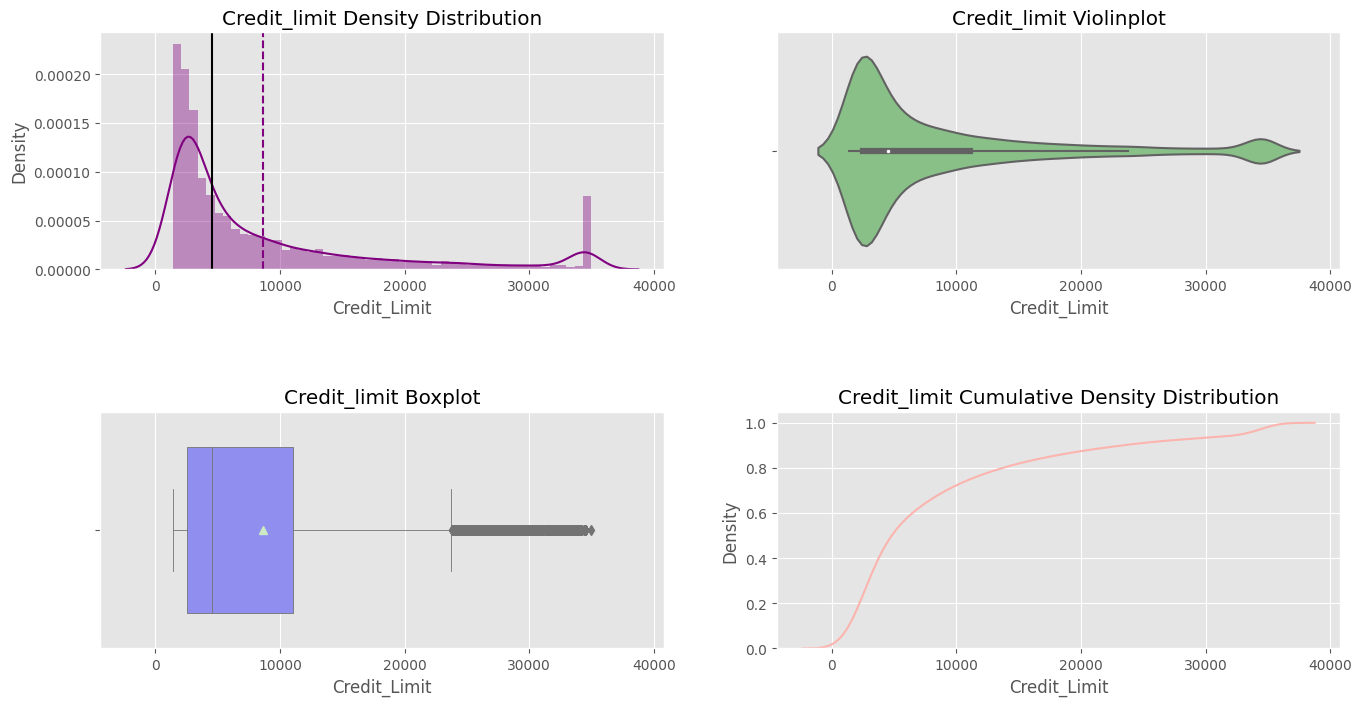

In [ ]:
summary(credit_data, "Credit_Limit")

In [ ]:
credit_data.groupby('Income_Category')['Credit_Limit'].mean().sort_values(ascending=True)

Income_Category
Less than $40K    2495.456
$40K - $60K       5161.829
$60K - $80K      11693.949
$80K - $120K     26856.356
$120K +          32541.097
Name: Credit_Limit, dtype: float64

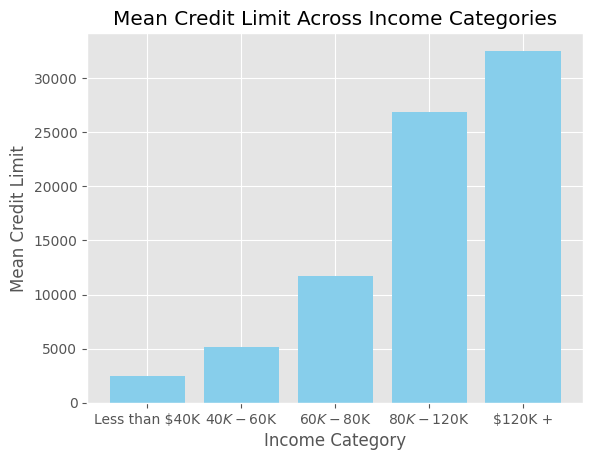

In [ ]:
import matplotlib.pyplot as plt

# Assuming credit_data is your DataFrame
income_categories = ['Less than $40K','$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
credit_limits = [2495.456, 5161.829, 11693.949, 26856.356, 32541.097]

# Plotting the vertical bar plot
plt.bar(income_categories, credit_limits, color='skyblue')
plt.xlabel('Income Category')
plt.ylabel('Mean Credit Limit')
plt.title('Mean Credit Limit Across Income Categories')
plt.show()


In [ ]:
credit_data.groupby('Education_Level')['Credit_Limit'].mean().sort_values(ascending=True)

Education_Level
Uneducated       1887.657
High School      3655.940
College          8097.837
Graduate        10393.970
Post-Graduate   29635.734
Doctorate       30339.754
Name: Credit_Limit, dtype: float64

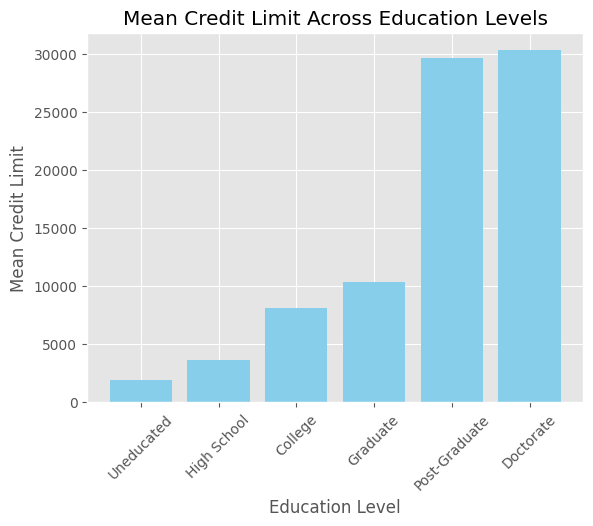

In [ ]:
import matplotlib.pyplot as plt

# Assuming credit_data is your DataFrame
education_levels = ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
credit_limits = [1887.657, 3655.940, 8097.837, 10393.970, 29635.734, 30339.754]

# Plotting the bar plot
plt.bar(education_levels, credit_limits, color='skyblue')
plt.xlabel('Education Level')
plt.ylabel('Mean Credit Limit')
plt.title('Mean Credit Limit Across Education Levels')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


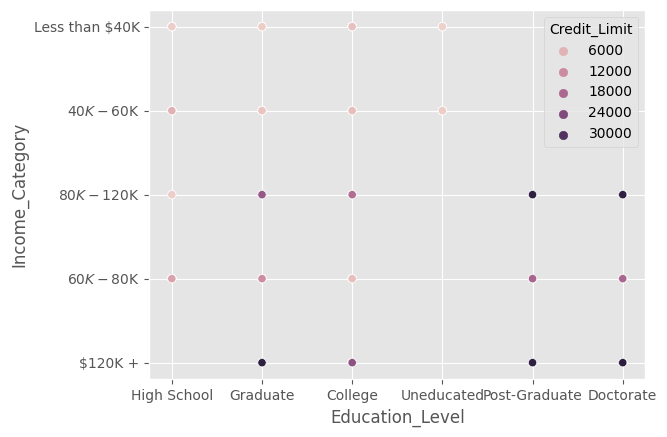

In [ ]:

# Assuming df is your DataFrame
sns.scatterplot(x='Education_Level', y='Income_Category', hue='Credit_Limit', data=credit_data)
plt.show()


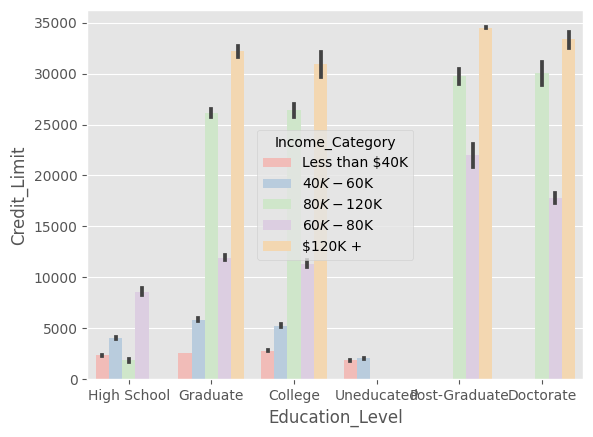

In [ ]:
sns.barplot(x='Education_Level', y='Credit_Limit', hue='Income_Category', data=credit_data)
plt.show()


<h1>Hypothesis 2 </h1>-
LOGISTIC REGRESSION

I have Credit card dataset
It has column Attrition_flag( with values Existing Customer and Attrited Customer) , utilization ratio(with values from 0 to 0.99)

Null Hypothesis (H0): The utilization ratio has no effect on the likelihood of a person being an attrition customer.

Alternative Hypothesis (H1): If a person has a utilization ratio less than 0.5, then the chances of that person being an attrition customer are higher.

In [ ]:
import pandas as pd
import statsmodels.api as sm


credit_data['Attrition_Flag'] = credit_data['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
credit_data['utilization_less_than_0.5'] = (credit_data['Avg_Utilization_Ratio'] < 0.5).astype(int)

# Logistic regression
X = sm.add_constant(credit_data['utilization_less_than_0.5'])
y = credit_data['Attrition_Flag']

model = sm.Logit(y, X)
result = model.fit()

# Print the logistic regression summary
print(result.summary())

# Conduct a hypothesis test on the utilization_less_than_0.5 coefficient
print("\nHypothesis Test Results:")
print("Null hypothesis (H0): The utilization ratio has no effect on the likelihood of being an attrition customer.")
print("Alternative hypothesis (H1): If a person has a utilization ratio less than 0.5, then the chances of being an attrition customer are higher.")

# Get the p-value for the utilization_less_than_0.5 coefficient
p_value = result.pvalues['utilization_less_than_0.5']

print(f"\nP-value for utilization_less_than_0.5: {p_value}")

# Check if the p-value is less than the significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis. There is a significant effect of utilization ratio on the likelihood of being an attrition customer.")
else:
    print("\nFail to reject the null hypothesis. There is no significant effect of utilization ratio on the likelihood of being an attrition customer.")


Optimization terminated successfully.
         Current function value: 0.381469
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         Attrition_Flag   No. Observations:                20071
Model:                          Logit   Df Residuals:                    20069
Method:                           MLE   Df Model:                            1
Date:                Sun, 26 Nov 2023   Pseudo R-squ.:                0.003594
Time:                        01:41:33   Log-Likelihood:                -7656.5
converged:                       True   LL-Null:                       -7684.1
Covariance Type:            nonrobust   LLR p-value:                 1.068e-13
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -2.2982      0.059    -39.067      0.000      -2.

In [ ]:
credit_data.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Ct,Avg_Utilization_Ratio,Quarter,Year,Date_Leave
0,712672083,Existing Customer,65,F,0,High School,Married,Less than $40K,Blue,36,3,3,2,1438.300,747,691.300,24,0.519,none,2018,"none,2018"
1,713049933,Existing Customer,47,F,1,Graduate,Married,$40K - $60K,Silver,36,5,2,2,5756.000,0,5756.000,44,0.000,none,2018,"none,2018"


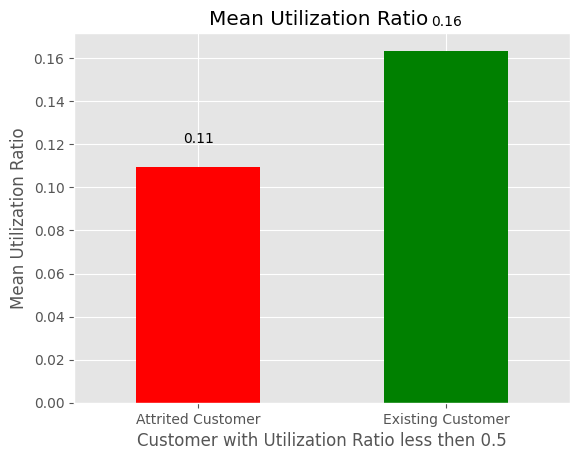

In [ ]:
filtered_data = credit_data[credit_data['Avg_Utilization_Ratio'] < 0.5]

mean_utilization_ratio = filtered_data.groupby('Attrition_Flag')['Avg_Utilization_Ratio'].mean()

# Plotting the bar chart
mean_utilization_ratio.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Customer with Utilization Ratio less then 0.5')
plt.ylabel('Mean Utilization Ratio')
plt.title('Mean Utilization Ratio ')
plt.xticks(rotation=0)
for i, value in enumerate(mean_utilization_ratio):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()

CHI - SQAURE TEST - proves same thing


Chi-square test:
Use a chi-square test of independence if both "Attrition_flag" and "utilization_ratio" are categorical variables.
If "utilization_ratio" is continuous, you would need to discretize it into categories first.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming you have a DataFrame named 'credit_data' with columns 'Attrition_flag' and 'utilization_ratio'
# Make sure 'utilization_ratio' is converted into a categorical variable based on your thresholds

# For example, create a new column 'utilization_category' based on the threshold 0.5
credit_data['utilization_category'] = pd.cut(credit_data['Avg_Utilization_Ratio'], bins=[-float('inf'), 0.5, float('inf')], labels=['Less than 0.5', '0.5 and above'])

# Create a contingency table
contingency_table = pd.crosstab(credit_data['Attrition_Flag'], credit_data['utilization_category'])

# Perform the chi-squared test
chi2, p, dof, expected  = chi2_contingency(contingency_table)

# Print the result
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

# Check if the p-value is less than your chosen significance level (e.g., 0.05)
if p < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between utilization ratio and attrition.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between utilization ratio and attrition.")


Chi-squared value: 50.77752694816439
P-value: 1.0345145597359718e-12
Reject the null hypothesis: There is a significant relationship between utilization ratio and attrition.


when utilzation less then 50 , give them offers , etc

In [ ]:
#existing =0 attrited =1

In [ ]:
credit_data.groupby('Attrition_Flag')['Total_Relationship_Count'].mean().sort_values(ascending=True)

Attrition_Flag
1   3.556
0   3.855
Name: Total_Relationship_Count, dtype: float64

In [ ]:

credit_data.groupby('Attrition_Flag')['Contacts_Count_12_mon'].mean().sort_values(ascending=True)

Attrition_Flag
0   2.406
1   2.741
Name: Contacts_Count_12_mon, dtype: float64

In [ ]:

credit_data.groupby('Attrition_Flag')['Credit_Limit'].mean().sort_values(ascending=True)

Attrition_Flag
0   2.647
1   2.793
Name: Months_Inactive_12_mon, dtype: float64

Personalized Communication:

Send personalized messages to customers who are identified as likely to churn. Tailor these messages based on their specific needs and usage patterns. Personalization can demonstrate that the bank understands and values the customer.
Special Offers and Incentives:

Offer special promotions, discounts, or rewards to incentivize customers to stay. These incentives could include lower interest rates, fee waivers, or exclusive access to certain services.
Improve Customer Service:

Enhance customer service to address any issues or concerns the customer may have. A positive customer service experience can significantly impact customer satisfaction and loyalty.